In [2]:
import numpy as np 
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Dataset_Li-ion'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#每次循环返回 (dirname, subdirs, files)，你这里把 subdirs 用 _ 占位忽略了，只关心 files。
# os.walk() 会递归遍历 /kaggle/input 下的所有子目录。
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Dataset_Li-ion/.DS_Store
Dataset_Li-ion/utils.py
Dataset_Li-ion/Readme file - Description of Experimental Tests.txt
Dataset_Li-ion/Technical Information and Experimental Test Results for LG 18650HG2.pdf
Dataset_Li-ion/40degC/556_US06.csv
Dataset_Li-ion/40degC/556_Charge8.csv
Dataset_Li-ion/40degC/555_C20DisCh.csv
Dataset_Li-ion/40degC/556_UDDS.csv
Dataset_Li-ion/40degC/562_Charge14.csv
Dataset_Li-ion/40degC/562_Charge15.csv
Dataset_Li-ion/40degC/556_Mixed1.csv
Dataset_Li-ion/40degC/562_Charge16.csv
Dataset_Li-ion/40degC/556_Mixed2.csv
Dataset_Li-ion/40degC/562_Charge12.csv
Dataset_Li-ion/40degC/562_Mixed8.csv
Dataset_Li-ion/40degC/562_Charge13.csv
Dataset_Li-ion/40degC/562_Charge11.csv
Dataset_Li-ion/40degC/562_Charge10.csv
Dataset_Li-ion/40degC/556_LA92.csv
Dataset_Li-ion/40degC/562_Mixed7.csv
Dataset_Li-ion/40degC/562_Mixed6.csv
Dataset_Li-ion/40degC/562_Mixed4.csv
Dataset_Li-ion/40degC/555_Dis_2C.csv
Dataset_Li-ion/40degC/562_Mixed5.csv
Dataset_Li-ion/40degC/557_Charge10.csv
Dataset

In [3]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import time, random
from datetime import datetime, timedelta
import pytz, plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

In [4]:
Main_Path="Dataset_Li-ion/"

In [6]:
import pandas as pd

# Read the data, specify correct delimiter (comma or tabs), skip irrelevant rows (e.g., metadata)
train1 = os.path.join(Main_Path, "25degC/")

l = os.listdir(train1)
l = [i for i in l if i.endswith(".csv")]
l

['549_Dis_0p5C.csv',
 '551_Charge6.csv',
 '551_Charge7.csv',
 '551_Cap_1C.csv',
 '551_Charge5.csv',
 '551_Charge4.csv',
 '552_Mixed8.csv',
 '551_Mixed2.csv',
 '551_Charge1.csv',
 '551_Mixed1.csv',
 '551_Charge3.csv',
 '551_Charge2.csv',
 '552_Charge11.csv',
 '551_UDDS.csv',
 '552_Charge10.csv',
 '552_Charge12.csv',
 '552_Charge13.csv',
 '551_US06.csv',
 '552_Charge16.csv',
 '552_Charge14.csv',
 '552_Charge15.csv',
 '552_PausCycl.csv',
 '551_HWFET.csv',
 '549_Dis_2C.csv',
 '552_Charge9.csv',
 '549_C20DisCh.csv',
 '552_Mixed3.csv',
 '549_Charge.csv',
 '551_LA92.csv',
 '552_Mixed5.csv',
 '551_Charge8.csv',
 '552_Mixed4.csv',
 '552_Mixed6.csv',
 '549_HPPC.csv',
 '552_Cap_1C.csv',
 '552_Mixed7.csv']

# 1. Data Collection

## OCV data

- 10degC/575_C20DisCh.csv
- 549_C20DisCh

In [11]:
import os
import glob
# Get all files ending with '_C20DisCh.csv'
files = glob.glob(os.path.join(Main_Path, "**", "*_C20DisCh.csv"), recursive=True)
# Print results
print("All matching files:", *files,sep="\n")

All matching files:
Dataset_Li-ion/40degC/555_C20DisCh.csv
Dataset_Li-ion/0degC/585_C20DisCh.csv
Dataset_Li-ion/n20degC/607_C20DisCh.csv
Dataset_Li-ion/25degC/549_C20DisCh.csv
Dataset_Li-ion/10degC/575_C20DisCh.csv
Dataset_Li-ion/n10degC/593_C20DisCh.csv


In [17]:
df = pd.read_csv('Dataset_Li-ion/25degC/549_C20DisCh.csv',skiprows=28)
df = df.drop(index=0).reset_index(drop=True) 
df=df.drop(columns=df.columns[df.columns.str.contains('^Unnamed')], errors='ignore') #去掉尾部多余的一列
# 常见于 to_csv(index=True) 导出的 CSV，再被 read_csv 读回时，就会产生一个 Unnamed: 0 列（它其实是原来的行索引）
df.head(5)

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt
0,10/26/2018 9:29:22 AM,22.0,DCH,29:20:19.688,00:01:00.002,0.0,0.0,LG_HG2_NN_Char,4.17604,-0.15069,23.97615,-0.00254,-0.01060,13.00000
1,10/26/2018 9:30:22 AM,22.0,DCH,29:21:19.688,00:02:00.002,0.0,0.0,LG_HG2_NN_Char,4.17301,-0.15325,23.97615,-0.00507,-0.02116,13.00000
2,10/26/2018 9:31:22 AM,22.0,DCH,29:22:19.688,00:03:00.002,0.0,0.0,LG_HG2_NN_Char,4.17014,-0.15069,23.97615,-0.00761,-0.03176,13.00000
3,10/26/2018 9:32:22 AM,22.0,DCH,29:23:19.685,00:03:59.999,0.0,0.0,LG_HG2_NN_Char,4.16761,-0.15069,23.76583,-0.01014,-0.04232,13.00000
4,10/26/2018 9:33:22 AM,22.0,DCH,29:24:19.688,00:05:00.002,0.0,0.0,LG_HG2_NN_Char,4.16509,-0.15325,23.66067,-0.01268,-0.05290,13.00000


In [50]:
# 把字符串变成真正的时间
df["Time Stamp"] = pd.to_datetime(
    df["Time Stamp"],            # 10/26/2018 9:29:22 AM
    format="%m/%d/%Y %I:%M:%S %p"
)

# 把 HH:MM:SS.sss（小时可>24）变成 Timedelta
df["Prog Time"] = pd.to_timedelta(df["Prog Time"])

# Voltage 一定要是 float
df["Voltage"] = pd.to_numeric(df["Voltage"], errors="coerce")

df.head(5)

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt
0,2018-10-26 09:29:22,22.0,DCH,1 days 05:20:19.688000,00:01:00.002,0.0,0.0,LG_HG2_NN_Char,4.17604,-0.15069,23.97615,-0.00254,-0.01060,13.00000
1,2018-10-26 09:30:22,22.0,DCH,1 days 05:21:19.688000,00:02:00.002,0.0,0.0,LG_HG2_NN_Char,4.17301,-0.15325,23.97615,-0.00507,-0.02116,13.00000
2,2018-10-26 09:31:22,22.0,DCH,1 days 05:22:19.688000,00:03:00.002,0.0,0.0,LG_HG2_NN_Char,4.17014,-0.15069,23.97615,-0.00761,-0.03176,13.00000
3,2018-10-26 09:32:22,22.0,DCH,1 days 05:23:19.685000,00:03:59.999,0.0,0.0,LG_HG2_NN_Char,4.16761,-0.15069,23.76583,-0.01014,-0.04232,13.00000
4,2018-10-26 09:33:22,22.0,DCH,1 days 05:24:19.688000,00:05:00.002,0.0,0.0,LG_HG2_NN_Char,4.16509,-0.15325,23.66067,-0.01268,-0.05290,13.00000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423 entries, 0 to 2422
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Time Stamp   2423 non-null   datetime64[ns] 
 1   Step         2423 non-null   float64        
 2   Status       2423 non-null   object         
 3   Prog Time    2423 non-null   timedelta64[ns]
 4   Step Time    2423 non-null   object         
 5   Cycle        2423 non-null   float64        
 6   Cycle Level  2423 non-null   float64        
 7   Procedure    2423 non-null   object         
 8   Voltage      2423 non-null   float64        
 9   Current      2423 non-null   object         
 10  Temperature  2423 non-null   object         
 11  Capacity     2423 non-null   object         
 12  WhAccu       2423 non-null   object         
 13  Cnt          2423 non-null   object         
dtypes: datetime64[ns](1), float64(4), object(8), timedelta64[ns](1)
memory usage: 265.1+ KB


In [58]:
df = df.sort_values("Prog Time").reset_index(drop=True)

df_dis = df_dis.assign(t_rel=df.loc[df_dis.index, "t_rel"].values)
df_chg = df_chg.assign(t_rel=df.loc[df_chg.index, "t_rel"].values)
   


In [62]:
t0 = df["Prog Time"].iloc[0]
df["t_rel"] = (df["Prog Time"] - t0).dt.total_seconds()

t_dis = df_dis["t_rel"]
t_chg = df_chg["t_rel"]

print(t_dis.head(5))
print(t_chg.head(5))


0      0.000
1     60.000
2    120.000
3    179.997
4    240.000
Name: t_rel, dtype: float64
1158    69393.861
1159    69453.859
1160    69513.862
1161    69573.859
1162    69633.860
Name: t_rel, dtype: float64


In [63]:
df_chg.head(5)

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,t_rel
1158,2018-10-27 04:45:56,24.0,CHA,2 days 00:36:53.549000,00:01:00.002,0.0,0.0,LG_HG2_NN_Char,2.95864,0.14814,23.97615,-2.77827,-10.29552,13.00000,69393.861
1159,2018-10-27 04:46:56,24.0,CHA,2 days 00:37:53.547000,00:02:00.000,0.0,0.0,LG_HG2_NN_Char,2.97820,0.14814,23.87099,-2.77580,-10.28818,13.00000,69453.859
1160,2018-10-27 04:47:56,24.0,CHA,2 days 00:38:53.550000,00:03:00.003,0.0,0.0,LG_HG2_NN_Char,2.99573,0.14814,23.97615,-2.77332,-10.28078,13.00000,69513.862
1161,2018-10-27 04:48:56,24.0,CHA,2 days 00:39:53.547000,00:04:00.000,0.0,0.0,LG_HG2_NN_Char,3.01157,0.15069,23.87099,-2.77084,-10.27334,13.00000,69573.859
1162,2018-10-27 04:49:56,24.0,CHA,2 days 00:40:53.548000,00:05:00.001,0.0,0.0,LG_HG2_NN_Char,3.02624,0.14814,23.97615,-2.76837,-10.26586,13.00000,69633.860


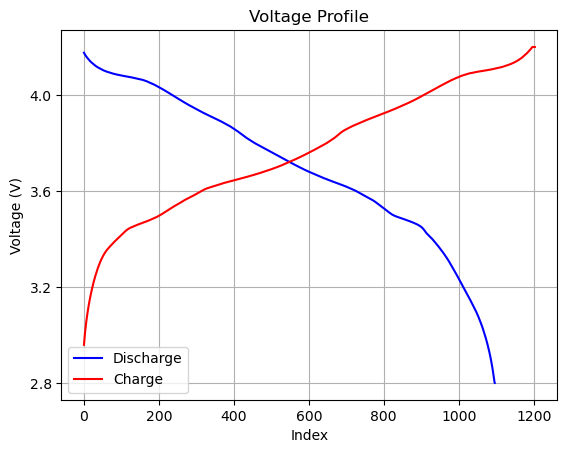

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()                                   # ← 拿到 ax 对象
ax.plot(np.arange(len(df_dis)), df_dis['Voltage'],
        label="Discharge", color='b')

ax.plot(np.arange(len(df_chg)), df_chg['Voltage'],
         label="Charge", color='r')

ax.set_xlabel("Index")
ax.set_ylabel("Voltage (V)")
ax.set_title("Voltage Profile")
ax.legend()
ax.grid()

# 关键：y 轴主刻度最多 5 个
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

plt.show()


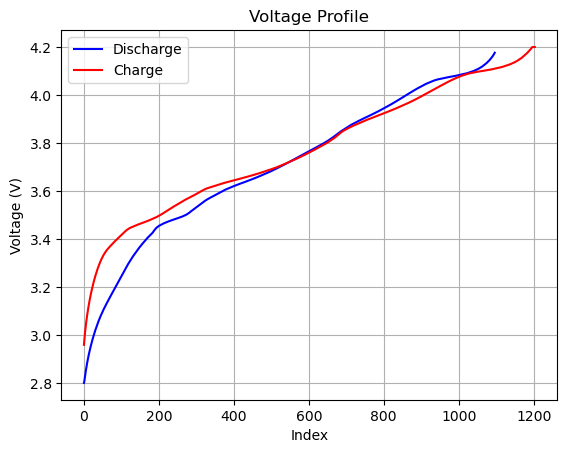

In [66]:
plt.plot(np.arange(len(df_dis)), df_dis['Voltage'][::-1], label="Discharge", color='b')  
# [::-1] 是 Python 切片语法 [开始:结束:步长] 中最简短的一种“反向切片”写法。让任何可切片序列“一键倒序”
plt.plot(np.arange(len(df_chg)), df_chg['Voltage'], label="Charge", color='r')
plt.xlabel("Index")
plt.ylabel("Voltage (V)")
plt.title("Voltage Profile")
plt.legend()
plt.grid()
plt.show()


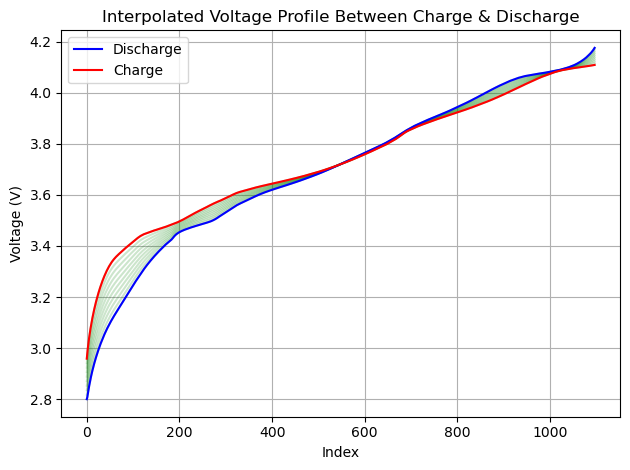

In [ ]:
"""
目标：将放电曲线（Discharge）和充电曲线（Charge）对齐后， 在两者之间插值生成多条过渡曲线，可视化电压随 SoC 先降后升的回环现象。
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Ensure both series have the same length by trimming to the shortest
# 1. 预处理：确保两条曲线点数一致（取二者中较短者，便于对齐）
# ----------------------------------------------------------------------
min_len = min(len(df_dis), len(df_chg))           # df_dis / df_chg 事先已按时间排序
x_common = np.linspace(0, min_len - 1, min_len)   # 统一的横坐标 (0~N-1)，这里只用索引

# 2. 构造插值模型
# ----------------------------------------------------------------------
#    ► np.vstack  把两条 1×N 电压序列堆成 2×N 矩阵：
#        第 0 行 = 反转后的放电曲线        → param = 0
#        第 1 行 = 充电曲线（原顺序）      → param = 1
#    ► interp1d  在 param∈[0,1] 之间做线性插值 (kind='linear')
interp_model = interp1d(
    [0, 1],                                        # param 轴：0=全放电, 1=全充电
    np.vstack([
        df_dis['Voltage'][:min_len][::-1],         # 放电电压倒序 (高-->低)
        df_chg['Voltage'][:min_len]                # 充电电压正序 (低-->高)
    ]),
    axis=0,                                        # 在“曲线编号”这一维插值
    kind='linear'                                  # 线性插值；改 'cubic' 会更平滑
)


# 3. 生成若干插值曲线并绘图 Generate interpolated values in between
# ----------------------------------------------------------------------
interp_steps = np.linspace(0, 1, 10)               # 0,0.11,…,1 ⇒ 10 条曲线 # Creates 10 interpolated curves between discharge and charge
for step in interp_steps:
    plt.plot(
        x_common,
        interp_model(step),                        # 在 param=step 处取插值结果
        color='g',
        alpha=0.2                                  # 半透明淡绿色，形成“渐变带”
    )


# 4. 把真实的放电 / 充电曲线叠加上去
# ----------------------------------------------------------------------
plt.plot(x_common, df_dis['Voltage'][:min_len][::-1],  # 反转后的放电曲线
         label="Discharge", color='b')
plt.plot(x_common, df_chg['Voltage'][:min_len],        # 充电曲线
         label="Charge", color='r')


# 5. 画图收尾：标签、网格、图例等
# ----------------------------------------------------------------------
plt.xlabel("Index")                                   # 如果有相对时间，可换成 “Time (s)”
plt.ylabel("Voltage (V)")
plt.title("Interpolated Voltage Profile Between Charge & Discharge")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



# SoC percentage for discharging and charging

In [73]:
df_dis

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,t_rel,SoC Capacity,SoC Percentage
0,2018-10-26 09:29:22,22.0,DCH,1 days 05:20:19.688000,00:01:00.002,0.0,0.0,LG_HG2_NN_Char,4.17604,-0.15069,23.97615,-0.00254,-0.01060,13.00000,0.000,2.77820,0.999087
1,2018-10-26 09:30:22,22.0,DCH,1 days 05:21:19.688000,00:02:00.002,0.0,0.0,LG_HG2_NN_Char,4.17301,-0.15325,23.97615,-0.00507,-0.02116,13.00000,60.000,2.77567,0.998177
2,2018-10-26 09:31:22,22.0,DCH,1 days 05:22:19.688000,00:03:00.002,0.0,0.0,LG_HG2_NN_Char,4.17014,-0.15069,23.97615,-0.00761,-0.03176,13.00000,120.000,2.77313,0.997263
3,2018-10-26 09:32:22,22.0,DCH,1 days 05:23:19.685000,00:03:59.999,0.0,0.0,LG_HG2_NN_Char,4.16761,-0.15069,23.76583,-0.01014,-0.04232,13.00000,179.997,2.77060,0.996353
4,2018-10-26 09:33:22,22.0,DCH,1 days 05:24:19.688000,00:05:00.002,0.0,0.0,LG_HG2_NN_Char,4.16509,-0.15325,23.66067,-0.01268,-0.05290,13.00000,240.000,2.76806,0.995440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2018-10-27 03:41:22,22.0,DCH,1 days 23:32:19.688000,18:13:00.002,0.0,0.0,LG_HG2_NN_Char,2.84021,-0.15325,23.97615,-2.77169,-10.27726,13.00000,65520.000,0.00905,0.003255
1093,2018-10-27 03:42:22,22.0,DCH,1 days 23:33:19.685000,18:13:59.999,0.0,0.0,LG_HG2_NN_Char,2.82943,-0.15325,23.97615,-2.77423,-10.28447,13.00000,65579.997,0.00651,0.002341
1094,2018-10-27 03:43:22,22.0,DCH,1 days 23:34:19.686000,18:15:00.000,0.0,0.0,LG_HG2_NN_Char,2.81830,-0.15325,23.97615,-2.77677,-10.29163,13.00000,65639.998,0.00397,0.001428
1095,2018-10-27 03:44:22,22.0,DCH,1 days 23:35:19.686000,18:16:00.000,0.0,0.0,LG_HG2_NN_Char,2.80667,-0.15325,23.97615,-2.77931,-10.29878,13.00000,65699.998,0.00143,0.000514


In [ ]:
# # here we use absolute value of minimum value in Capacity column because it is a discharge and value is negative
# max_discharge = abs(min(df_dis["Capacity"])) # get maximum discharge
# df_dis["SoC Capacity"] = max_discharge + df_dis["Capacity"]
# df_dis["SoC Percentage"] = df_dis["SoC Capacity"] / max(df_dis["SoC Capacity"])
#🆘Capacity 列里有字符串（dtype 变成 object），min() 先返回了一个字符串，abs() 于是抛错：

# ① 把 Capacity 转成 float；无法解析的值（空格、-- 等）会变 NaN
df_dis["Capacity"] = pd.to_numeric(df_dis["Capacity"], errors="coerce")
# 
# ② 如有 NaN，可剔除或填 0
# df_dis = df_dis.dropna(subset=["Capacity"])        # 或 df_dis["Capacity"].fillna(0, inplace=True)

# ③ 重新计算 SoC
max_discharge = -df_dis["Capacity"].min()          # 放电→负值，取反得正数  用 -df["Capacity"].min() 比 abs(min()) 可读性高，也少一次隐式类型转换。
df_dis["SoC Capacity"]   = max_discharge + df_dis["Capacity"]
df_dis["SoC Percentage"] = df_dis["SoC Capacity"] / max_discharge


In [90]:
df_dis["Capacity"]

0      -0.00254
1      -0.00507
2      -0.00761
3      -0.01014
4      -0.01268
         ...   
1092   -2.77169
1093   -2.77423
1094   -2.77677
1095   -2.77931
1096   -2.78074
Name: Capacity, Length: 1097, dtype: float64

In [ ]:
df_dis["SoC Percentage"]


0       0.999087
1       0.998177
2       0.997263
3       0.996353
4       0.995440
          ...   
1092    0.003255
1093    0.002341
1094    0.001428
1095    0.000514
1096    0.000000
Name: SoC Percentage, Length: 1097, dtype: float64

In [76]:
df_dis.tail()

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,t_rel,SoC Capacity,SoC Percentage
1092,2018-10-27 03:41:22,22.0,DCH,1 days 23:32:19.688000,18:13:00.002,0.0,0.0,LG_HG2_NN_Char,2.84021,-0.15325,23.97615,-2.77169,-10.27726,13.00000,65520.000,0.00905,0.003255
1093,2018-10-27 03:42:22,22.0,DCH,1 days 23:33:19.685000,18:13:59.999,0.0,0.0,LG_HG2_NN_Char,2.82943,-0.15325,23.97615,-2.77423,-10.28447,13.00000,65579.997,0.00651,0.002341
1094,2018-10-27 03:43:22,22.0,DCH,1 days 23:34:19.686000,18:15:00.000,0.0,0.0,LG_HG2_NN_Char,2.81830,-0.15325,23.97615,-2.77677,-10.29163,13.00000,65639.998,0.00397,0.001428
1095,2018-10-27 03:44:22,22.0,DCH,1 days 23:35:19.686000,18:16:00.000,0.0,0.0,LG_HG2_NN_Char,2.80667,-0.15325,23.97615,-2.77931,-10.29878,13.00000,65699.998,0.00143,0.000514
1096,2018-10-27 03:44:56,22.0,DCH,1 days 23:35:53.540000,18:16:33.854,0.0,0.0,LG_HG2_NN_Char,2.79993,-0.15069,23.97615,-2.78074,-10.30280,13.00000,65733.852,0.00000,0.000000


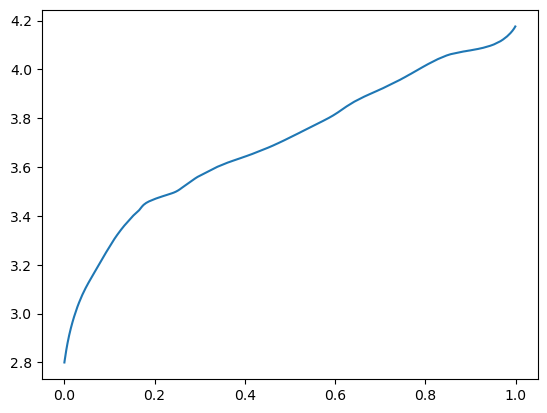

In [ ]:
plt.plot(df_dis['SoC Percentage'],df_dis['Voltage'])

In [110]:
# ① 将 Capacity 转为数值型
df_chg["Capacity"] = pd.to_numeric(df_chg["Capacity"], errors="coerce")

# ② 如有 NaN，可剔除或填 0
# df_chg = df_chg.dropna(subset=["Capacity"])        # 或 df_chg["Capacity"].fillna(0, inplace=True)

# ③ 重新计算 SoC
cap_min = df_chg["Capacity"].min()
cap_max = df_chg["Capacity"].max()
max_charge = abs(cap_min) + abs(cap_max)      
df_chg["SoC Percentage"] = (df_chg["Capacity"] - cap_min) / max_charge
df_chg["SoC Percentage"]

1158    0.000000
1159    0.000832
1160    0.001668
1161    0.002503
1162    0.003335
          ...   
2357    0.998949
2358    0.999346
2359    0.999687
2360    0.999987
2361    1.000000
Name: SoC Percentage, Length: 1204, dtype: float64

In [111]:
max_charge

2.96847

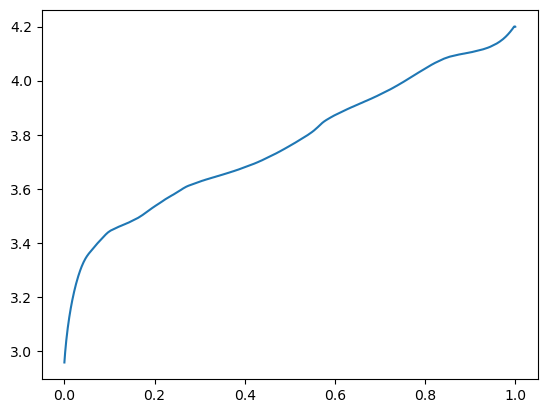

In [112]:
plt.plot(df_chg['SoC Percentage'],df_chg['Voltage'])

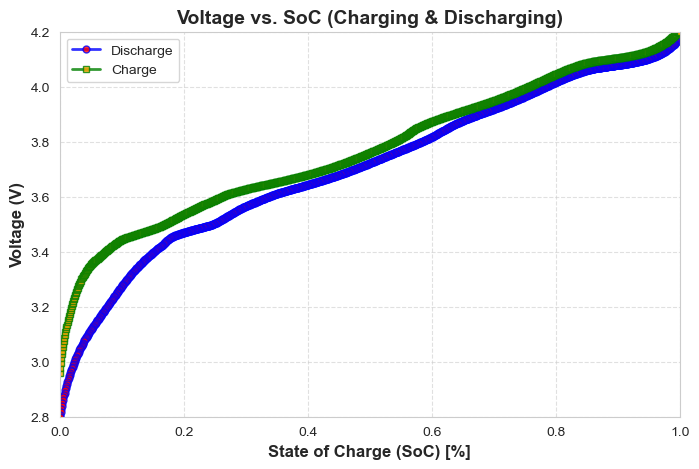

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(8, 5))

# Plot Discharge Curve
plt.plot(df_dis['SoC Percentage'], df_dis['Voltage'], 
         color='blue', linewidth=2, linestyle='-', 
         marker='o', markersize=5, markerfacecolor='red', 
         alpha=0.8, label="Discharge")

# Plot Charge Curve
plt.plot(df_chg['SoC Percentage'], df_chg['Voltage'], 
         color='green', linewidth=2, linestyle='-', 
         marker='s', markersize=5, markerfacecolor='orange', 
         alpha=0.8, label="Charge")

# Labels and Title
plt.xlabel("State of Charge (SoC) [%]", fontsize=12, fontweight='bold')
plt.ylabel("Voltage (V)", fontsize=12, fontweight='bold')
plt.title("Voltage vs. SoC (Charging & Discharging)", fontsize=14, fontweight='bold')

# Grid and Customization
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(min(df_dis['SoC Percentage'].min(), df_chg['SoC Percentage'].min()), 
         max(df_dis['SoC Percentage'].max(), df_chg['SoC Percentage'].max()))  # Auto-scale X-axis
plt.ylim(min(df_dis['Voltage'].min(), df_chg['Voltage'].min()), 
         max(df_dis['Voltage'].max(), df_chg['Voltage'].max()))  # Auto-scale Y-axis

# Legend
plt.legend(fontsize=10, loc="best")

# Show the plot
plt.show()


# 3. Open Circuit Voltage and SOC relationship

- 用 50 % SoC 的充放电电压差估算极化 (δV)
- 低 SoC 端采充电曲线并减去 SoC×δV，高 SoC 端采放电曲线并加 (1‑SoC)×δV，强制两端在 50 % 会合
- 两段合并并插值即可得到去除极化的逼真 OCV 曲线

In [119]:
import numpy as np                              # 引入数值运算库

df_dis["disAh"] = np.abs(df_dis['Capacity'])
df_chg["chgAh"] = (df_chg['Capacity']) + max_discharge

# 若你之前已执行 df_dis["Prog Time"] = pd.to_timedelta(...)
df_dis["Time Seconds"] = df_dis["Prog Time"].dt.total_seconds()
df_chg["Time Seconds"] = df_chg["Prog Time"].dt.total_seconds()

# 🗂️ 放电段：各列转 NumPy 数组，后续向量化计算更快
disAh       = df_dis["disAh"].to_numpy()        # 累积容量 (Ah)
dis_current = df_dis["Current"].to_numpy()      # 电流 (A)
dis_time    = df_dis["Time Seconds"].to_numpy() # 绝对时间 (s)
dis_time    = dis_time - dis_time[0]            # 以起点对齐 ⇒ 相对时间 0 s
disV        = df_dis["Voltage"].to_numpy()      # 电压 (V)
disZ        = df_dis["SoC Percentage"].to_numpy() # SoC (%)

# ⚡ 充电段同理
chgAh       = df_chg["chgAh"].to_numpy()
chg_current = df_chg["Current"].to_numpy()
chg_time    = df_chg["Time Seconds"].to_numpy()
chg_time    = chg_time - chg_time[0]            # 充电相对时间
chgV        = df_chg["Voltage"].to_numpy()
chgZ        = df_chg["SoC Percentage"].to_numpy()

# 🎚️ 生成 0 → 1 的标准 SoC 采样点，步长 0.005 (=0.5%)
SOC = np.arange(0, 1.005, 0.005)



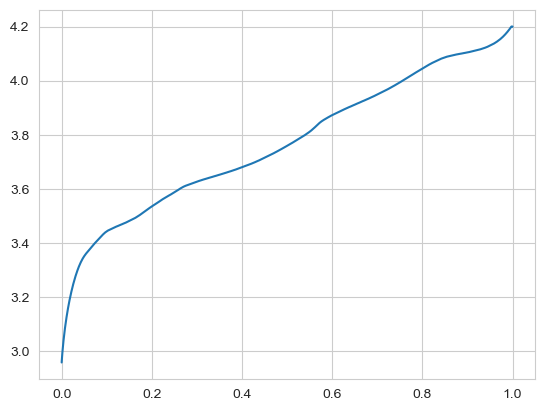

In [123]:
plt.plot(chgZ, chgV) # we use this graph for SOC less than 0.5

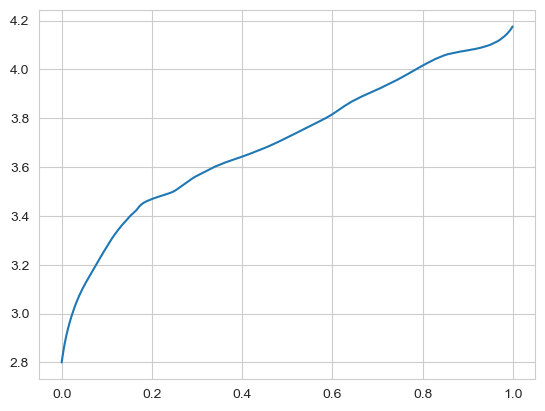

In [124]:
plt.plot(disZ, disV) # we use this graph for SOC greater than 0.5

In [ ]:
import numpy as np
from scipy.interpolate import interp1d   # 🎚️ 1D 插值工具

# 🔧 构造两个插值函数:
#   interp1d(chgZ, chgV)  → 充电段: SoC% ➡ 电压
#   interp1d(disZ, disV)  → 放电段: SoC% ➡ 电压
# ⚠️ 默认 kind='linear'，若需更平滑可传 kind='cubic'
# 🏷️ 取 SoC = 0.5 (50%) 时两条曲线的电压差
deltaV50 = interp1d(chgZ, chgV)(0.5) - interp1d(disZ, disV)(0.5)

deltaV50  # 📢 输出半荷电状态的极化电压差 Their difference `(deltaV50)` represents the hysteresis effect or IR drop.


0.03761333880582729

In [128]:
# This forces the charge voltage curve to pass through the midpoint of the charge-discharge hysteresis.
# This efficiently reconstructs the **true OCV** curve by blending charge/discharge curves at **50% SOC**.

ind_chg = np.where(chgZ < 0.5)[0]  # 🔍找出充电曲线中 SoC<0.5 的下标
zChg, vChg = chgZ[ind_chg], chgV[ind_chg] - chgZ[ind_chg] * deltaV50  # ⚡电压极化校正: 充电端减去 SoC×deltaV50

ind_dis = np.where(disZ > 0.5)[0]  # 🔍找出放电曲线中 SoC>0.5 的下标
zDis, vDis = np.flipud(disZ[ind_dis]), np.flipud(disV[ind_dis] + (1 - disZ[ind_dis]) * deltaV50)  # 🔄翻转顺序并校正: 放电端加 (1‑SoC)×deltaV50
# `flipud()` ensures correct order for interpolation.

raw_ocv = interp1d(                       # 🧮拼接两段后线性插值生成完整 OCV 曲线
    np.concatenate([zChg, zDis]),        #   x 轴: 合并校正后的 SoC
    np.concatenate([vChg, vDis]),        #   y 轴: 合并校正后的电压
    kind='linear',
    fill_value='extrapolate'             #   端点外推
)(SOC)                                   #   在标准 SOC 采样点上取值


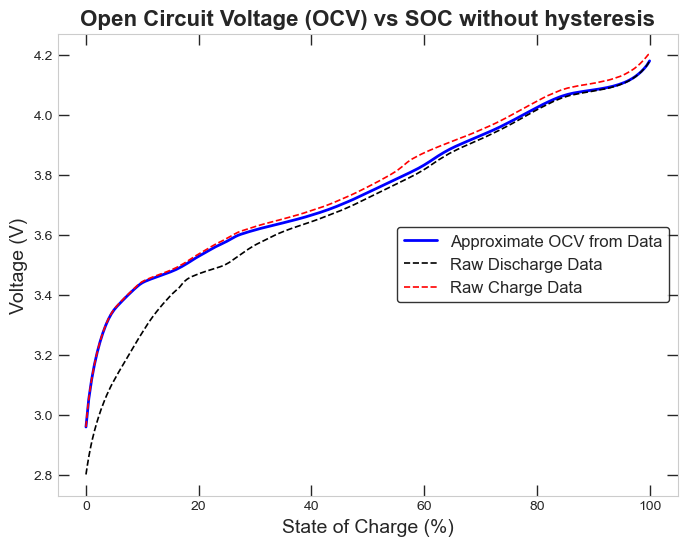

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set figure size for better visibility

# Plot data with enhanced styles
plt.plot(100 * SOC, raw_ocv, label='Approximate OCV from Data', linewidth=2, color='b')
plt.plot(100 * disZ, disV, linestyle='--', linewidth=1.2, color='k', label='Raw Discharge Data')
plt.plot(100 * chgZ, chgV, linestyle='--', linewidth=1.2, color='r', label='Raw Charge Data')

# Add grid for readability
#plt.grid(visible=True, which='major', linestyle='-', linewidth=0.8, alpha=0.8)  # Solid major grid
#plt.grid(visible=True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)  # Dotted minor grid


plt.tick_params(
    axis='both',       # Apply to both x and y axes
    which='both',      # Apply to both major and minor ticks
    direction='in',    # Ticks point inward (scientific style)
    length=8,         # Adjust major tick length
    width=1,          # Adjust tick width
    top=True,         # Enable top x-axis ticks
    bottom=True,      # Enable bottom x-axis ticks
    left=True,        # Enable left y-axis ticks
    right=True        # Enable right y-axis ticks
)

#plt.minorticks_on()  # Enable minor ticks for finer resolution
plt.grid(False) 

# Labels and title
plt.xlabel('State of Charge (%)', fontsize=14)
plt.ylabel('Voltage (V)', fontsize=14)
plt.title('Open Circuit Voltage (OCV) vs SOC without hysteresis', fontsize=16, fontweight='bold')

# Improved legend styling
plt.legend(
    loc='center right',
    fontsize=12,
    frameon=True,
    facecolor='white',
    edgecolor='black',
    fancybox=True,
    
)

# Show the plot
plt.show()


封装成函数。